### ASSIGNMENT - 14
### Topic - Decision Tree Fraud check
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q. Use decision trees to prepare a model on fraud data__

In [1]:
# importing necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Loadind of data
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Renamning the data
data2 = data.rename({'Marital.Status':'Maritial_status','Taxable.Income':'Taxable_income','City.Population':'City_population','Work.Experience':'Work_experience'},axis = 1)
data2.head()

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Checking of null values and data_type
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Maritial_status  600 non-null    object
 2   Taxable_income   600 non-null    int64 
 3   City_population  600 non-null    int64 
 4   Work_experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# using one_hot encoding
data2['Undergrad'] = data2['Undergrad'].map({'NO':0,'YES':1})
data2['Maritial_status'] = data2['Maritial_status'].map({'Single':1,'Divorced':0,'Married':2})
data2['Urban'] = data2['Urban'].map({'YES':1,'NO':0})
data2.head()

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0


In [6]:
# COnverting numeric data to catogerical data as mentioned in the problem statement

data2["taxable_income"]="GOOD"
data2.loc[data2["Taxable_income"]<=30000,"taxable_income"]="Risky"
data2.drop(['Taxable_income'],axis = 1,inplace = True)

In [7]:
# cheking if column is converted or not
data2[data2.taxable_income == 'GOOD']

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
0,0,1,50047,10,1,GOOD
1,1,0,134075,18,1,GOOD
2,0,2,160205,30,1,GOOD
3,1,1,193264,15,1,GOOD
4,0,2,27533,28,0,GOOD
...,...,...,...,...,...,...
595,1,0,39492,7,1,GOOD
596,1,0,55369,2,1,GOOD
597,0,0,154058,0,1,GOOD
598,1,2,180083,17,0,GOOD


In [8]:
# cheking if data is converted or not
data2[data2.taxable_income == 'Risky']

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
10,0,1,102602,19,1,Risky
12,0,0,148033,14,1,Risky
16,1,0,34551,29,0,Risky
19,0,1,126953,30,1,Risky
21,1,0,29106,7,1,Risky
...,...,...,...,...,...,...
544,0,1,133877,21,1,Risky
557,1,2,157421,10,0,Risky
567,1,1,129912,30,0,Risky
575,0,0,95975,13,1,Risky


In [9]:
# spliting the data into train and test 

x = data2.iloc[:,0:5]
y = data2.iloc[:,5]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 40)

In [10]:
# model building

modelDT = DecisionTreeClassifier(criterion = 'gini',max_depth = 4)
modelDT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

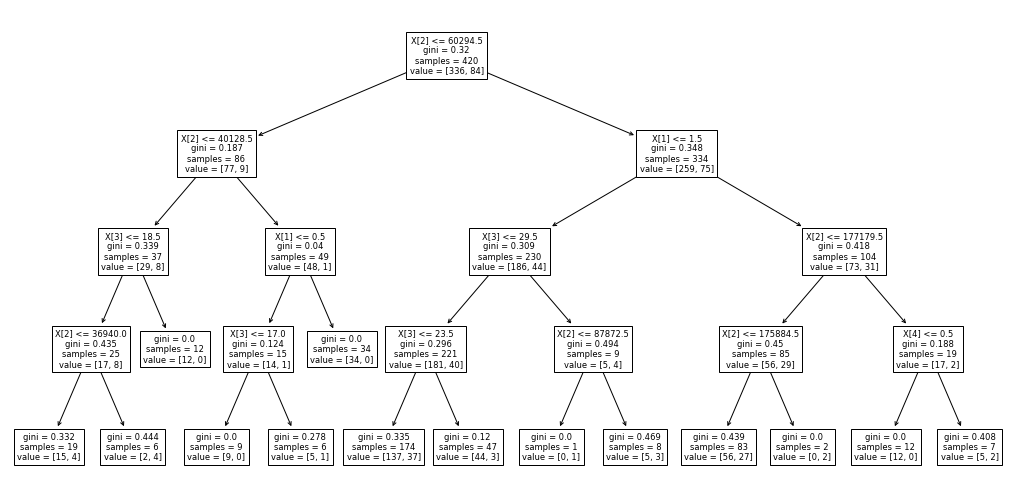

In [11]:
fig = plt.figure(figsize=(18,9))
tree.plot_tree(modelDT)
plt.show()

In [12]:
# predicting on test data set

preds = modelDT.predict(x_test)  
pd.Series(preds).value_counts()

GOOD     178
Risky      2
dtype: int64

In [13]:
print(preds)

['GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'Risky'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'GOO

In [14]:
#Accuracy
accuracy_score(y_test,preds)

0.7666666666666667

In [15]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df

,Actual,Predicted
159,GOOD,GOOD
307,GOOD,GOOD
253,GOOD,GOOD
528,GOOD,GOOD
137,Risky,GOOD
...,...,...
221,GOOD,GOOD
390,GOOD,GOOD
530,GOOD,GOOD
232,Risky,GOOD


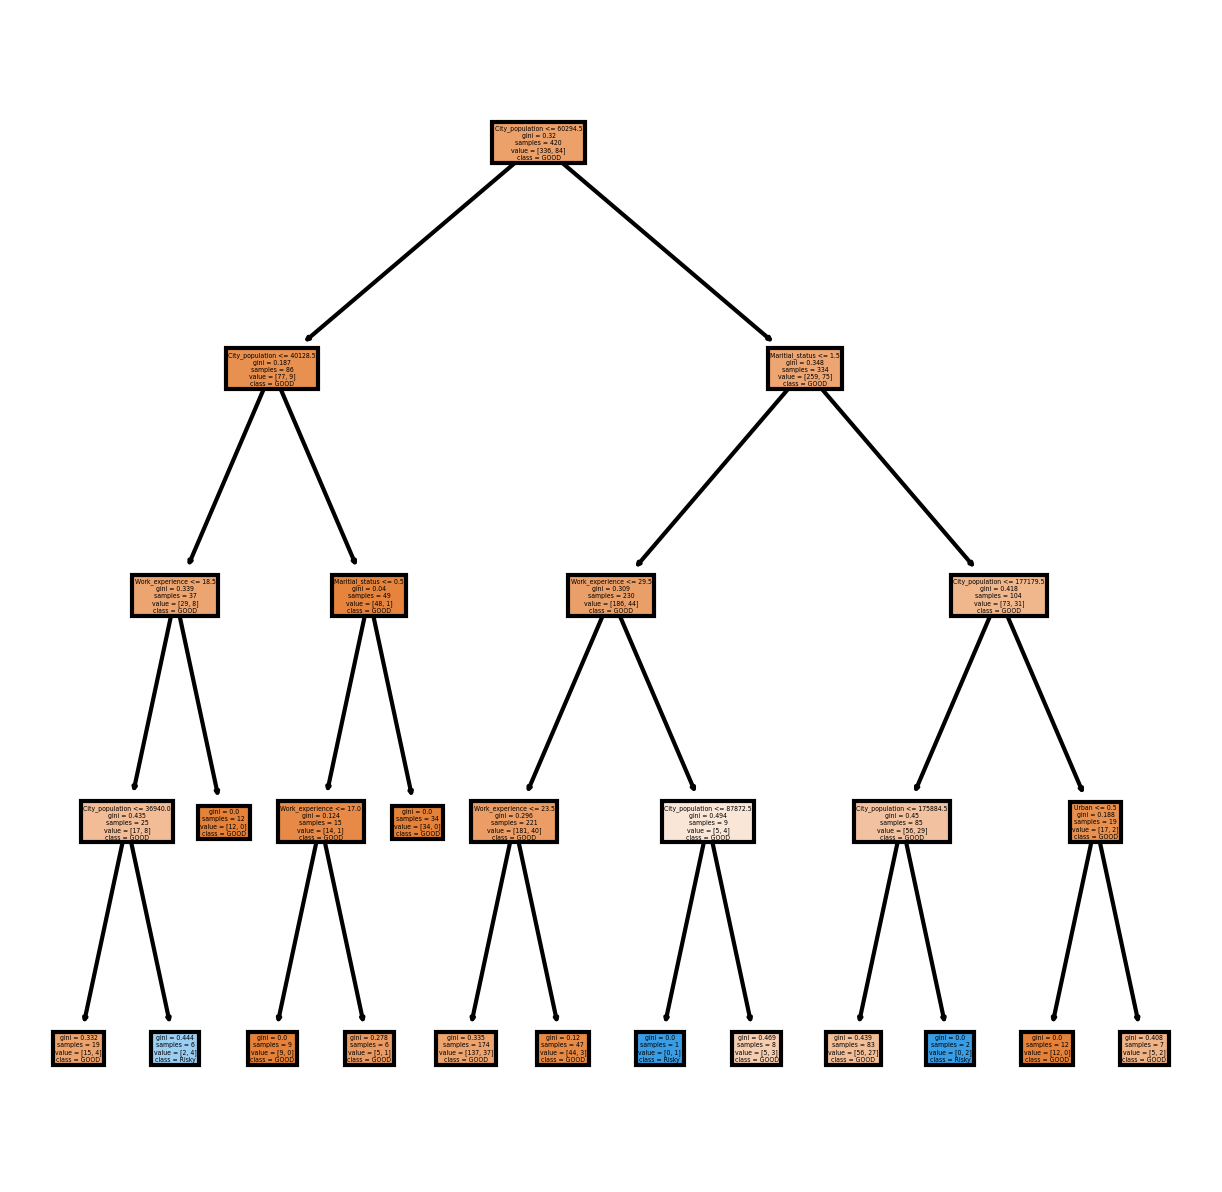

In [16]:
fn = ['Undergrad','Maritial_status','City_population','Work_experience','Urban']
cn = ['GOOD','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(modelDT,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [17]:
# Report and confusion matrix

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[138   2]
 [ 40   0]]
              precision    recall  f1-score   support

        GOOD       0.78      0.99      0.87       140
       Risky       0.00      0.00      0.00        40

    accuracy                           0.77       180
   macro avg       0.39      0.49      0.43       180
weighted avg       0.60      0.77      0.68       180



In [18]:
modelDT.feature_importances_

array([0.        , 0.1025298 , 0.5752969 , 0.27928179, 0.04289151])

In [19]:
imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': modelDT.feature_importances_}).\
                    sort_values('importance', ascending = False)
imp

,feature,importance
2,City_population,0.575297
3,Work_experience,0.279282
1,Maritial_status,0.102530
4,Urban,0.042892
0,Undergrad,0.000000


__From the table above, we can conclude that "City_Population" is the most important feature here.__